<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("skimr")
install.packages("psych")
install.packages("lsr")
install.packages("effsize")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
require(readxl)
library(skimr)
library(psych)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [3]:
meta <- read_xlsx('/content/metadata.xlsx', sheet =1)
meta <- rename_with(meta, make.names)
meta <- select(meta, -Name, -Sucrose)
meta <- mutate(meta,Patient.number = as.factor(Patient.number),
              Vial.number = as.factor(Vial.number),
              Group = as.factor(Group),
              Sm = as.factor(Sm),
              LVH = as.factor(LVH),
              IHD = as.factor(IHD),
              MI = as.factor(MI),
              Str = as.factor(Str),
              A_C = as.factor(A_C),
              A_H = as.factor(A_H),
              A_D = as.factor(A_D))


In [4]:
descriptive <- read_xlsx('/content/metadata.xlsx', sheet = 2)
descriptive <- rename(descriptive, 'Variable'='...1', 'Description' = '...2')
descriptive <- drop_na(descriptive)

In [5]:
attr(meta$Ht, "label") <- "Growth"
attr(meta$Wt, "label") <- "Weight"
attr(meta$BMI, "label") <- "Body mass index"
attr(meta$Sys, "label") <- "Systolic blood pressure"
attr(meta$Dia, "label") <- "Diastolic blood pressure"
attr(meta$PR, "label") <- "Pulse"
attr(meta$Sm, "label") <- "Smoking"
attr(meta$Dm, "label") <- "Diabetes"
attr(meta$HT, "label") <- "Hypertension"
attr(meta$LVH, "label") <- "Left ventricular hypertrophy by electrocardiogram"
attr(meta$MI, "label") <- "Medical history of infarction"
attr(meta$Str, "label") <- "Medical history of stroke"
attr(meta$A_C, "label") <- "Family history of CAD"
attr(meta$A_H, "label") <- "Family history hypertension"
attr(meta$A_D, "label") <- "Family history diabetes"
attr(meta$Choi...25, "label") <- "Cholesterol"
attr(meta$Choi...29, "label") <- "Cholesterol"
attr(meta$Tgi...26, "label") <- "Triglycerides"
attr(meta$Tgi...30, "label") <- "Triglycerides"
attr(meta$HDLi...27, "label") <- "High density lipoprotein"
attr(meta$HDLi...31, "label") <- "High density lipoprotein"
attr(meta$LDLi...28, "label") <- "Low density lipoprotein"
attr(meta$LDLi...32, "label") <- "Low density lipoprotein"
attr(meta$AI, "label") <- "Atherogenicity index"



In [6]:
# Однофакторная ANOVA
# Независимая переменная тодщина бляшки Plaque. Данный фактор является категориальным дискретным(4 группы)
# ЗП - Choi...29. Уровенб холестерина. Количественная непреревная
# Выборки независимые

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


$title
[1] "Distribution of Choi...29"

attr(,"class")
[1] "labels"

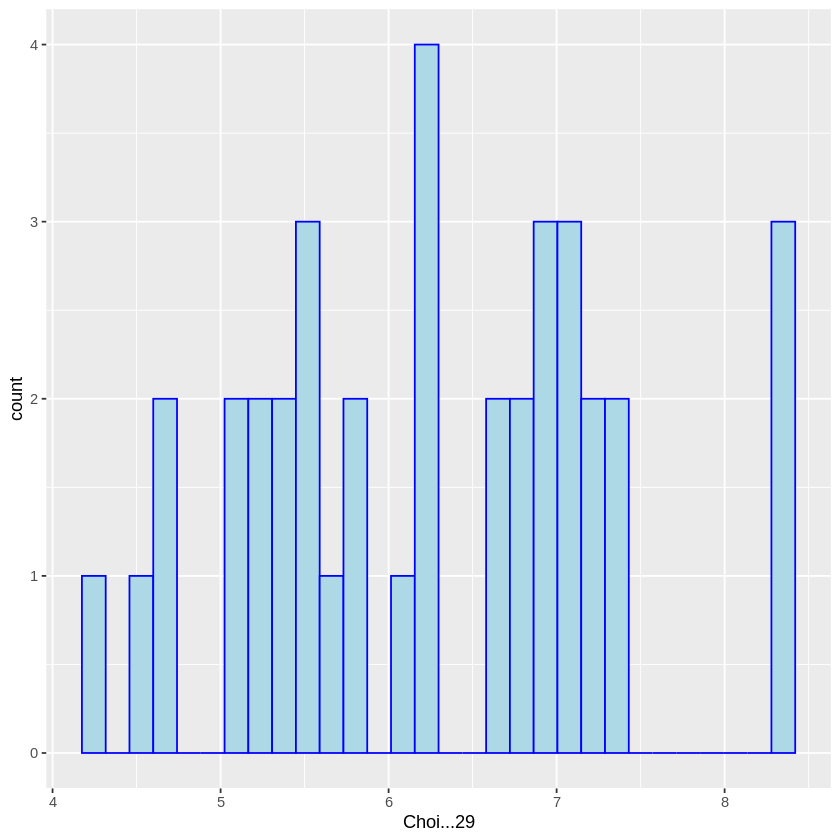

In [7]:
ggplot(meta, aes(Choi...29)) +
  geom_histogram(color = "blue", fill = "lightblue")
  ggtitle("Distribution of Choi...29")


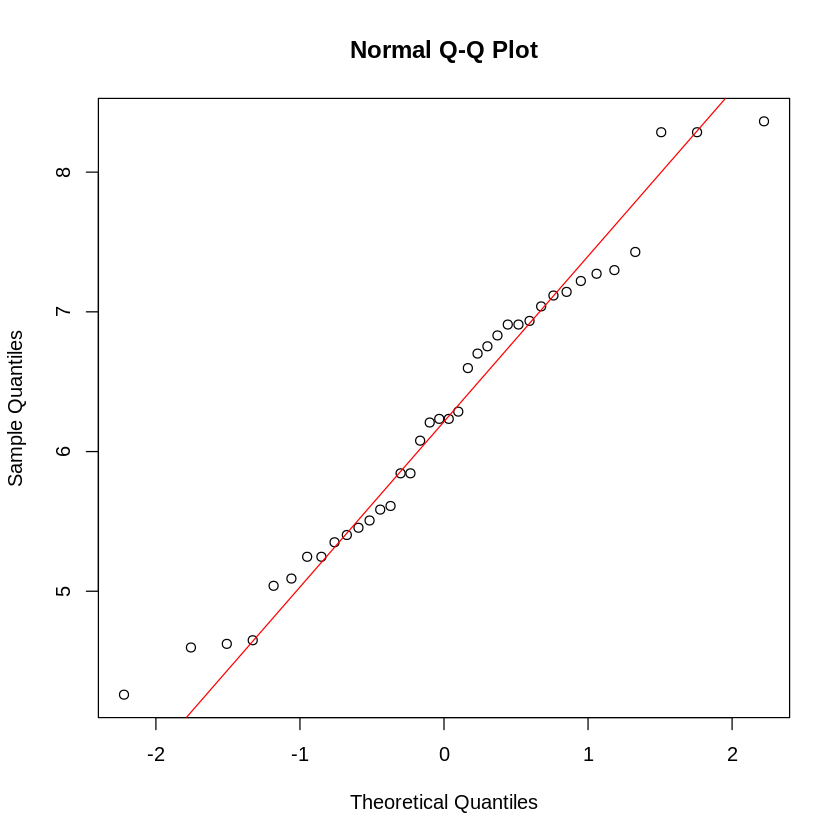

In [8]:
qqnorm(meta$Choi...29)
qqline(meta$Choi...29, col = "red")

In [9]:
shapiro.test(meta$Choi...29) # Тест Шапиро-Уилка. Данные следуют нормальному распределению.


	Shapiro-Wilk normality test

data:  meta$Choi...29
W = 0.96942, p-value = 0.3763


In [10]:
model_1_Choi_ANOVA <- aov(Choi...29 ~ factor(Plaque), data = meta)

In [11]:
summary(model_1_Choi_ANOVA)

               Df Sum Sq Mean Sq F value Pr(>F)
factor(Plaque)  3   5.66   1.887   1.751  0.175
Residuals      34  36.65   1.078               

In [12]:
# Проведем однофакторную ANOVA c ЗП - Age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


$title
[1] "Distribution of Age"

attr(,"class")
[1] "labels"

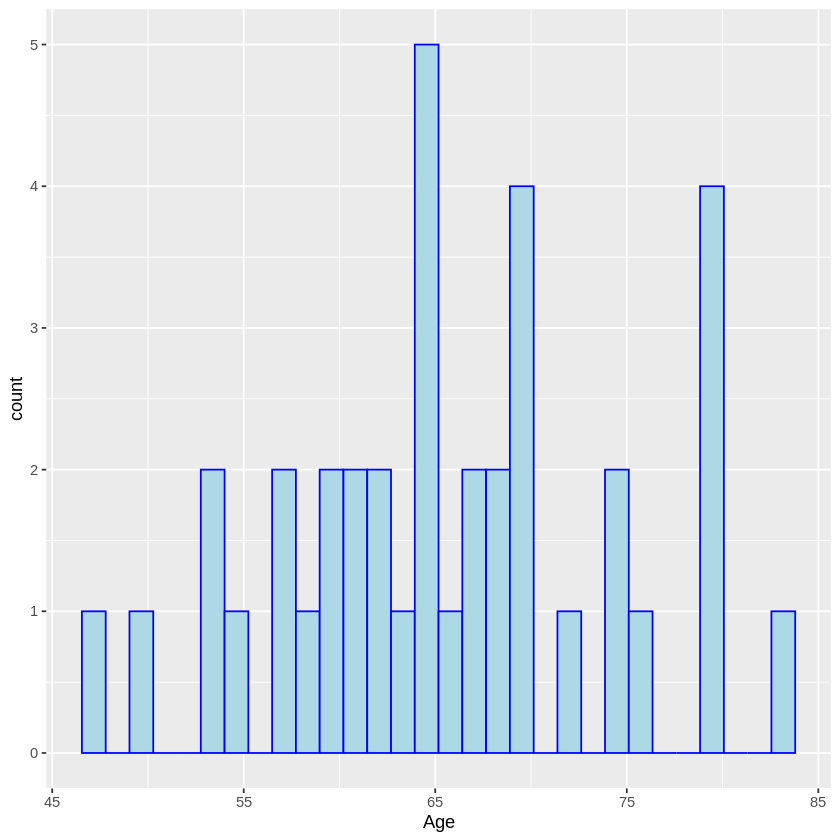

In [13]:
ggplot(meta, aes(Age)) +
  geom_histogram(color = "blue", fill = "lightblue")
  ggtitle("Distribution of Age")

# Распределение по возрасту, кажется стремится к нормальному

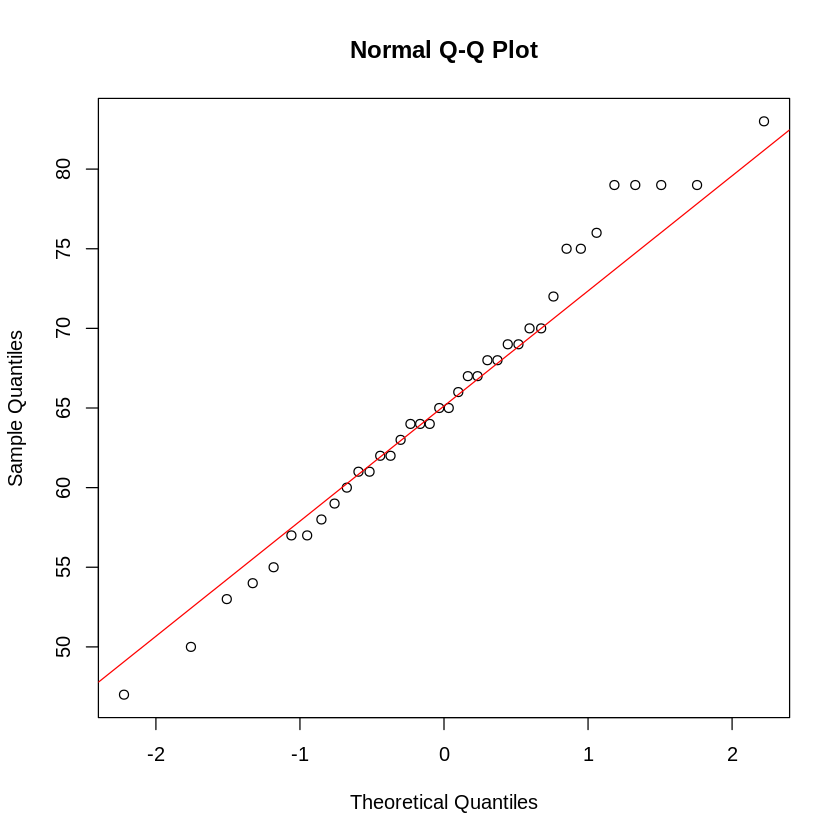

In [14]:
qqnorm(meta$Age)
qqline(meta$Age, col = "red")

In [15]:
shapiro.test(meta$Age) # Тест Шапиро-Уилка. Данные следуют нормальному распределению.


	Shapiro-Wilk normality test

data:  meta$Age
W = 0.9835, p-value = 0.8362


In [16]:
model_1_Age_ANOVA <- aov(Age ~ factor(Plaque), data = meta)

In [17]:
summary(model_1_Age_ANOVA)

               Df Sum Sq Mean Sq F value Pr(>F)  
factor(Plaque)  3  492.6  164.19   2.437 0.0815 .
Residuals      34 2290.7   67.37                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Выполнено два однофакторных дисперсиооных анализа, где Age, Choi...29 являются зависимыми переменными, а фактором, который анализир - толщина бляшки.

В ситуации с анализм холестерина, p-значение для фактора "Plaque" - 0.175, вероятность различий между группами не может быть статичтически значимой.

Age. Есть вероятность того, что значимые различия есть между группами по возрасту и толщиной бляшки, тк p-value - 0.0815

Если мы нашли, то провести необхлдимо post-hoc

In [18]:
TukeyHSD(model_1_Age_ANOVA)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Age ~ factor(Plaque), data = meta)

$`factor(Plaque)`
         diff        lwr      upr     p adj
1-0  6.266667  -7.753956 20.28729 0.6266400
2-0 11.882353  -2.000132 25.76484 0.1153107
3-0 10.000000  -8.100546 28.10055 0.4532258
2-1  5.615686  -2.237433 13.46881 0.2343208
3-1  3.733333 -10.287289 17.75396 0.8887836
3-2 -1.882353 -15.764838 12.00013 0.9829276


По результатам теста Тюкки, значимые различия между группами отсутствуют. Все значения p-value больше 0.05

Примения поправки на множественное тестирование, несмотря на что значимых различий между группами не обнаружено, чтобы избежать ошибку 1го рода(отвергнуть верную нулевую гипотиезу - Возраст не влияет на толщину бляшки)



In [19]:
p_val <- c(0.6266400, 0.1153107, 0.4532258, 0.2343208, 0.8887836, 0.9829276) #Бенджамини-Хохберга
p.adjusted <- p.adjust(p_val, method = "BH")
p.adjusted #скорректированные p-значения

[1] 0.9399600 0.6918642 0.9064516 0.7029624 0.9829276 0.9829276

Скорректированное значение больше альфа, p-значение(0.0815) не является статистически значимым после поправок на множественные тестирования. Различий в группах нет(по возрасту и толщине бляшки)
Возможно необходимо увеличить размер выборки

In [20]:
# Двуфакторная ANOVA

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


$title
[1] "Distribution of carotid.IMT.mean"

attr(,"class")
[1] "labels"

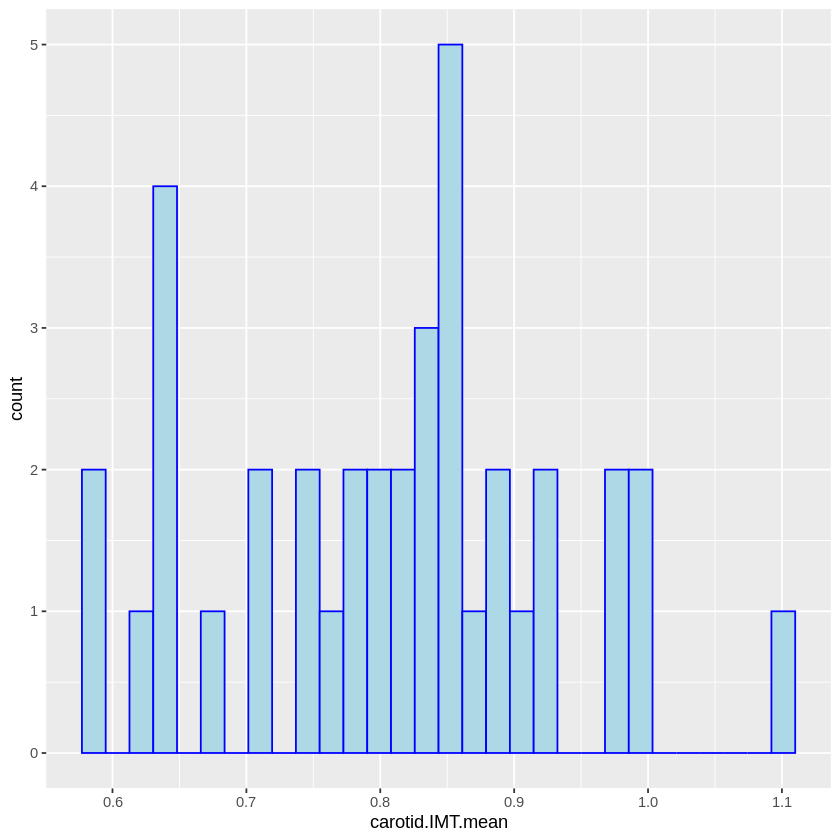

In [21]:
ggplot(meta, aes(carotid.IMT.mean)) +
  geom_histogram(color = "blue", fill = "lightblue")
  ggtitle("Distribution of carotid.IMT.mean")

# Распределение стремится к нормальному

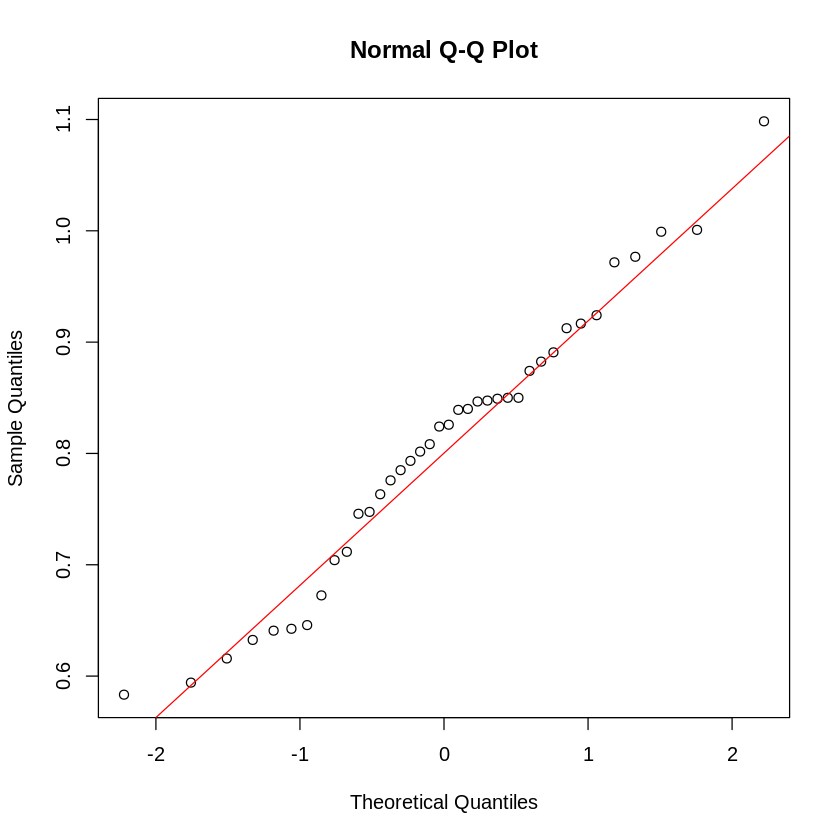

In [22]:
qqnorm(meta$carotid.IMT.mean)
qqline(meta$carotid.IMT.mean, col = "red")

In [23]:
shapiro.test(meta$carotid.IMT.mean) # Тест Шапиро-Уилка. Данные следуют нормальному распределению.


	Shapiro-Wilk normality test

data:  meta$carotid.IMT.mean
W = 0.97518, p-value = 0.5488


Две НП категориальные, дискретные - IHD(наличие ИБС), HT - ГБ Выборки независимы Оценим влияние на факторов на carotid.IMT.mean(средняя толщина интима-медиа сонной артерии)

ЗП(carotid.IMT.mean) количественная непрерывнная, нормально распределенная

In [24]:
model_2_IHD_HT <- aov(carotid.IMT.mean ~ factor(IHD) * factor(HT), data = meta)
summary(model_2_IHD_HT)

                       Df Sum Sq Mean Sq F value  Pr(>F)   
factor(IHD)             1 0.1038 0.10378   7.961 0.00792 **
factor(HT)              1 0.0127 0.01271   0.975 0.33033   
factor(IHD):factor(HT)  1 0.0127 0.01275   0.978 0.32972   
Residuals              34 0.4432 0.01304                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Фактор "IHD" имеет значимый эффект (p-value 0.00792) на толщину стенки сонных артерий, фактор "HT" и взаимодействие между "IHD" и "HT" не имеют значимых эффектов.

In [25]:
TukeyHSD(model_2_IHD_HT)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = carotid.IMT.mean ~ factor(IHD) * factor(HT), data = meta)

$`factor(IHD)`
         diff        lwr       upr    p adj
1-0 0.1045175 0.02923854 0.1797966 0.007924

$`factor(HT)`
          diff         lwr       upr     p adj
1-0 0.03466184 -0.04234299 0.1116667 0.3667572

$`factor(IHD):factor(HT)`
                diff          lwr       upr     p adj
1:0-0:0  0.036893939 -0.143147244 0.2169351 0.9449720
0:1-0:0  0.006998106 -0.136282705 0.1502789 0.9991635
1:1-0:0  0.126282828  0.003878361 0.2486873 0.0410739
0:1-1:0 -0.029895833 -0.218724619 0.1589330 0.9733474
1:1-1:0  0.089388889 -0.084132791 0.2629106 0.5132916
1:1-0:1  0.119284722 -0.015712820 0.2542823 0.0989962


Есть статистически значимые различия между группой 1:1-0:0(есть наличие ИБС, ГБ и нет наличия ИБ и ГБ)

In [ ]:
p_val <- c(0.9449720, 0.9991635, 0.0410739, 0.9733474, 0.5132916, 0.0989962) #Бенджамини-Хохберга
p.adjusted <- p.adjust(p_val, method = "BH")
p.adjusted #скорректированные p-значения

После применения попрвки мы не можем отвергнуть нулевую гипотезу и совершить ошибку первого рода.

Проведем еще один two-way Anova.

В качестве ЗП - AI, количиственная и непрерывная переменная, которая имеет нормальное распределение

НП - A_H и А_D, категориальные дискретные переменные

Посмотрим влияют ли факторы наличия ГБ и Диабета в анмнезе на индекс атерогенности.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


$title
[1] "Distribution of AI"

attr(,"class")
[1] "labels"

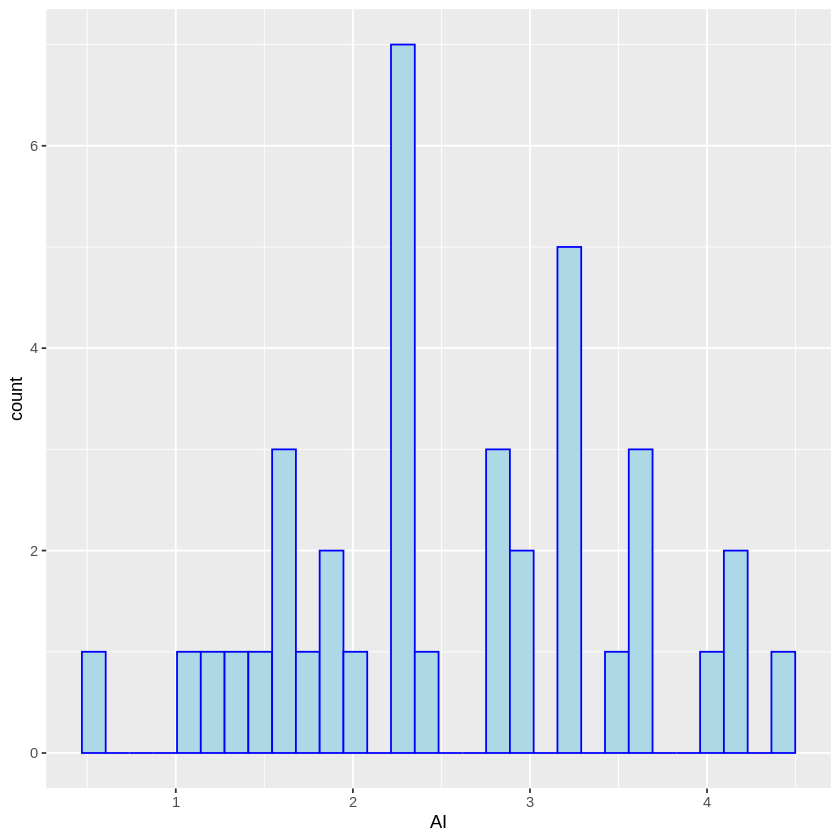

In [26]:
ggplot(meta, aes(AI)) +
  geom_histogram(color = "blue", fill = "lightblue")
  ggtitle("Distribution of AI")

# Распределение стремится к нормальному

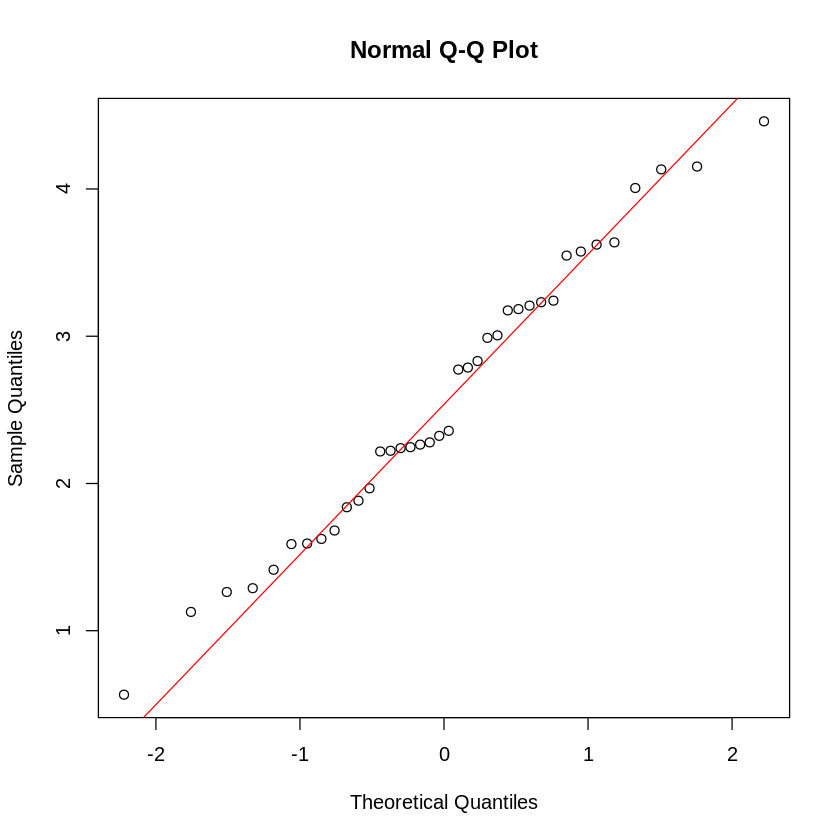

In [27]:
qqnorm(meta$AI)
qqline(meta$AI, col = "red")

In [28]:
shapiro.test(meta$AI) #распределение стремиться к нормальному


	Shapiro-Wilk normality test

data:  meta$AI
W = 0.97833, p-value = 0.6582


In [29]:
model_2_AH_AC <- aov(AI ~ factor(A_H) * factor(A_C), data = meta)
summary(model_2_AH_AC)

                        Df Sum Sq Mean Sq F value Pr(>F)  
factor(A_H)              1  0.283   0.283   0.326 0.5718  
factor(A_C)              1  0.635   0.635   0.729 0.3990  
factor(A_H):factor(A_C)  1  3.365   3.365   3.868 0.0574 .
Residuals               34 29.576   0.870                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Видно, чтотолько между факторами A_H и A_C получено статистически значимое различие (p - 0.0574). Значит средние значения в группах различаются в зависимости от уровней обоих факторов.

In [30]:
TukeyHSD(model_2_AH_AC)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = AI ~ factor(A_H) * factor(A_C), data = meta)

$`factor(A_H)`
          diff        lwr       upr     p adj
1-0 -0.1749382 -0.7977105 0.4478341 0.5718471

$`factor(A_C)`
          diff        lwr       upr     p adj
1-0 -0.2527993 -0.8818579 0.3762592 0.4197876

$`factor(A_H):factor(A_C)`
              diff        lwr       upr     p adj
1:0-0:0  0.4471512 -0.6943611 1.5886635 0.7169117
0:1-0:0  0.3283220 -0.8775506 1.5341946 0.8821722
1:1-0:0 -0.4995991 -1.5491765 0.5499782 0.5781632
0:1-1:0 -0.1188292 -1.5202634 1.2826051 0.9956852
1:1-1:0 -0.9467503 -2.2161998 0.3226991 0.2027980
1:1-0:1 -0.8279211 -2.1555431 0.4997009 0.3474226


Согласно тесту Тьюкки статистически значимых различий между групп нет, посмотрим еще на поправки

In [31]:
p_val <- c(0.7169117, 0.8821722, 0.5781632, 0.9956852, 0.2027980, 0.3474226) #Бенджамини-Хохберга
p.adjusted <- p.adjust(p_val, method = "BH")
p.adjusted #скорректированные p-значения

# Различия в группах не обнаружены

[1] 0.9956852 0.9956852 0.9956852 0.9956852 0.9956852 0.9956852

Проведем ANCOVA, чтобы посмотреть наличие связи между carotid.IMT.mean + наличие IHD, уровень AI и возраст как побочный фактор

In [32]:
model_ANCOVA <- lm(AI ~ factor(IHD) + factor(Plaque) + Age, data = meta)
summary(model_ANCOVA)


Call:
lm(formula = AI ~ factor(IHD) + factor(Plaque) + Age, data = meta)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.15127 -0.52681  0.02407  0.64571  1.65810 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)      3.09899    1.22679   2.526   0.0167 *
factor(IHD)1     0.19964    0.36472   0.547   0.5879  
factor(Plaque)1  0.49903    0.60690   0.822   0.4170  
factor(Plaque)2  1.16860    0.67961   1.720   0.0952 .
factor(Plaque)3  0.39547    0.86584   0.457   0.6509  
Age             -0.02109    0.01937  -1.089   0.2845  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9258 on 32 degrees of freedom
Multiple R-squared:   0.19,	Adjusted R-squared:  0.06341 
F-statistic: 1.501 on 5 and 32 DF,  p-value: 0.2172


Факторы не влияют на AI, p-value у всех больше 0.05 и переменные не являются статистически значимыми для предсказаний.

Посмотрим на связь Tgi и с толщиной блшки(Plaque) по критерию Крускала-Уоллиса



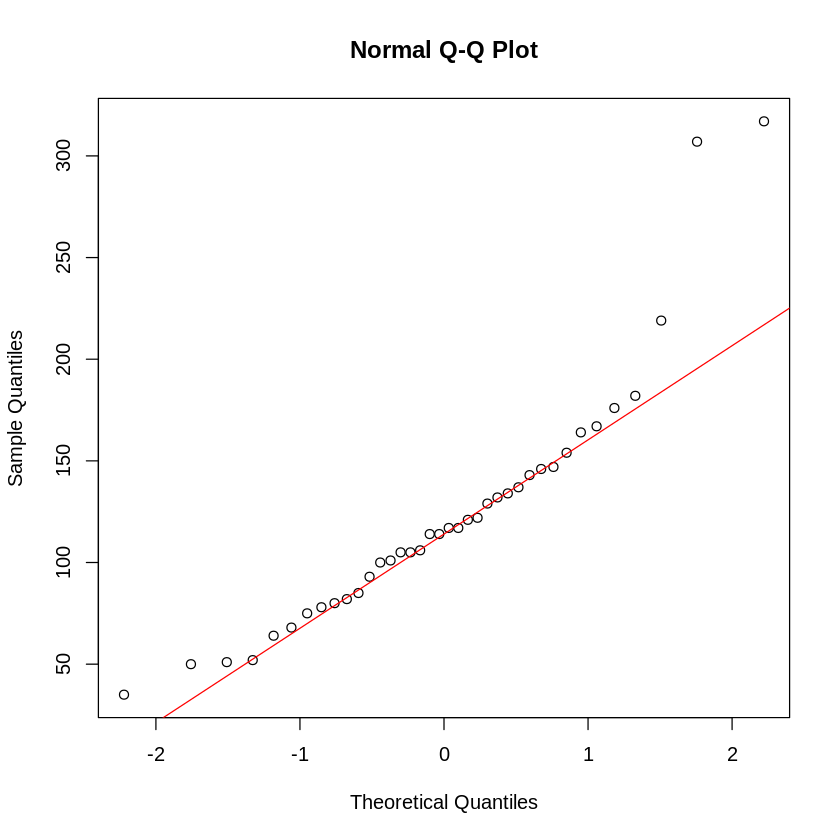

In [34]:
qqnorm(meta$Tgi...26)
qqline(meta$Tgi...26, col = "red")

In [35]:
shapiro.test(meta$Tgi...26) # Распределение не соответсует нормальному


	Shapiro-Wilk normality test

data:  meta$Tgi...26
W = 0.87282, p-value = 0.0004746


In [36]:
kruskal.test_Tgi <- kruskal.test(Tgi...26 ~ factor(Plaque), data = meta)
print(kruskal.test_Tgi)


	Kruskal-Wallis rank sum test

data:  Tgi...26 by factor(Plaque)
Kruskal-Wallis chi-squared = 2.0376, df = 3, p-value = 0.5646



In [ ]:
Pазличия между средними значениями выборок не являются статистически значимыми.: